# 1. Sıcaklık Tahmini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#import warnings

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
title_font = {"family":"arial", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"serif", "weight":"normal", "color":"darkgreen", "size":14}
# warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv("weatherHistory.csv")
weather.iloc[0:70000:15000]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
15000,2007-05-24 01:00:00.000 +0200,Mostly Cloudy,rain,17.405556,17.405556,0.78,19.4649,121.0,15.8746,0.0,1013.97,Partly cloudy until night.
30000,2009-07-11 00:00:00.000 +0200,Overcast,rain,14.444444,14.444444,0.90,6.4400,300.0,9.9820,0.0,1014.20,Mostly cloudy throughout the day.
45000,2011-08-26 00:00:00.000 +0200,Clear,rain,23.155556,23.155556,0.72,0.0000,0.0,9.9820,0.0,1014.40,Partly cloudy starting in the afternoon contin...
60000,2012-10-12 01:00:00.000 +0200,Mostly Cloudy,rain,5.644444,5.644444,0.96,3.2200,110.0,15.8263,0.0,1015.89,Mostly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 7.4+ MB


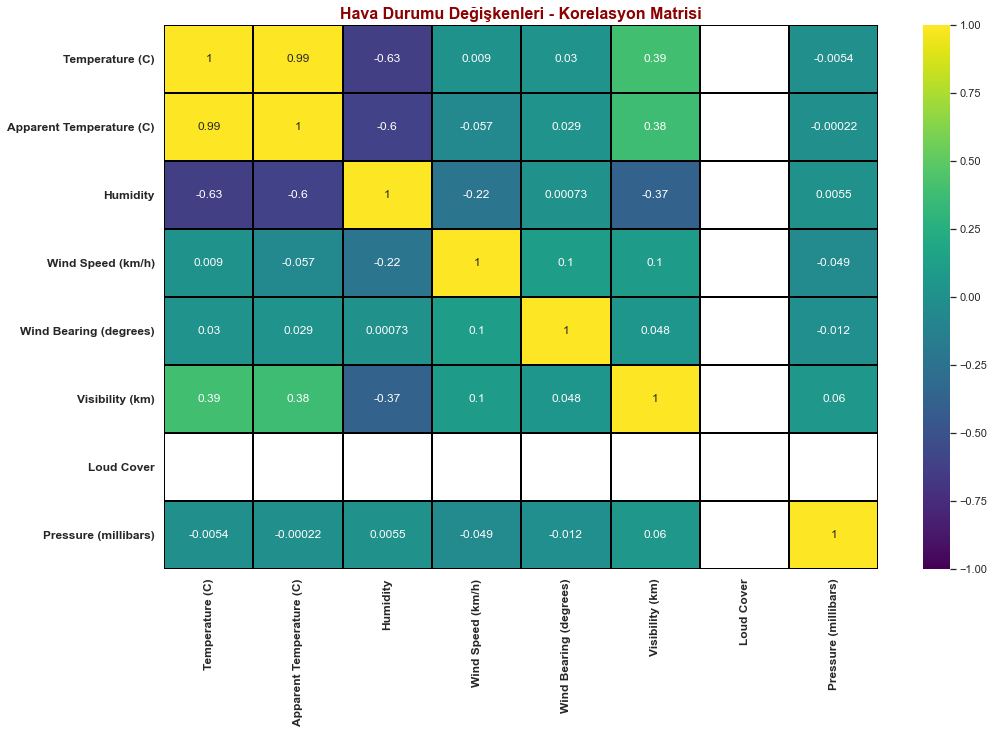

In [4]:
weather_corr = weather.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(weather_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask = None)
plt.xticks(size = 12, weight = "bold", rotation = 90)
plt.yticks(size = 12, weight = "bold")
plt.title("Hava Durumu Değişkenleri - Korelasyon Matrisi", fontdict = title_font)
plt.show()

In [5]:
y1 = weather["Temperature (C)"]
x1 = weather[["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Pressure (millibars)"]]

x1 = sm.add_constant(x1)
results1_model = sm.OLS(y1, x1)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:08:19   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Gauss-Markov varsayımlarının kontrolü
# Varsayım 1: Katsayılarda modelin doğrusallığı


In [7]:
# Varsayım 2: Hata terimi ortalamada sıfır olmalıdır
tahmin1 = results1.predict(x1)    # https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
hatalar1 = y1 - tahmin1

print(f"Hava durumu modelinin ortalama hatası: {hatalar1.mean():.16f}")

Hava durumu modelinin ortalama hatası: 0.0000000000078154


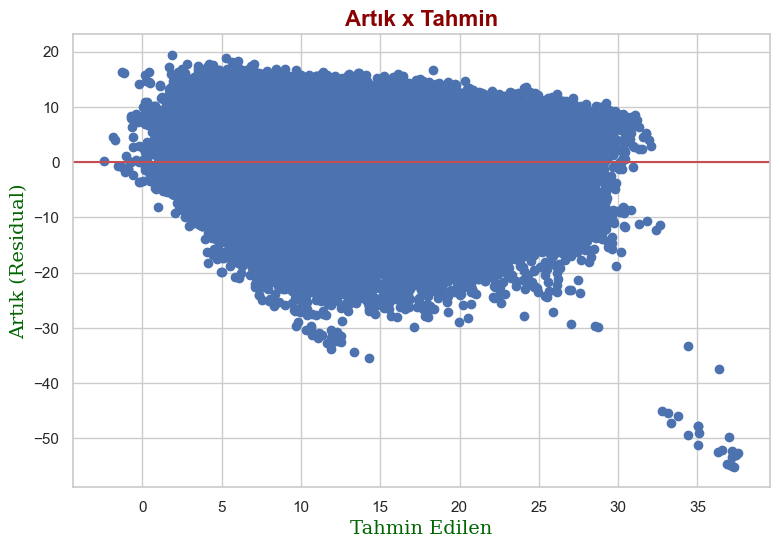

In [8]:
# Varsayım 3: homoscedasticity (eş varyanslık)
plt.figure(figsize=(9,6), dpi=100)
plt.scatter(tahmin1, hatalar1)
plt.xlabel('Tahmin Edilen', fontdict = axis_font)
plt.ylabel('Artık (Residual)', fontdict = axis_font)
plt.axhline(y=0, color="r")
plt.title('Artık x Tahmin', fontdict = title_font)
plt.show()

In [9]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats1 = bartlett(tahmin1, hatalar1)
lev_stats1 = levene(tahmin1, hatalar1)

print(f"Bartlett test değeri : {bart_stats1[0]:.3f} ve p değeri : {bart_stats1[1]:.21f}")
print(f"Levene test değeri   : {lev_stats1[0]:.3f} ve p değeri : {lev_stats1[1]:.21f}")

Bartlett test değeri : 2464.845 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.240 ve p değeri : 0.000000000000000000000


In [10]:
# null hipotezi ("Hatalarımız eş varyanslıdır.") reddedildiği için hatalarımız değişen varyanslıdır (heteroscedastic).

In [11]:
# Varsayım 4: düşük çoklu doğrusallık/low multicollinearity
# açıklayıcı değişkenlerin kendi içlerindeki korelasyonu
weather[["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Pressure (millibars)"]].corr()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Humidity,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),0.005454,-0.049263,-0.011651,1.000000


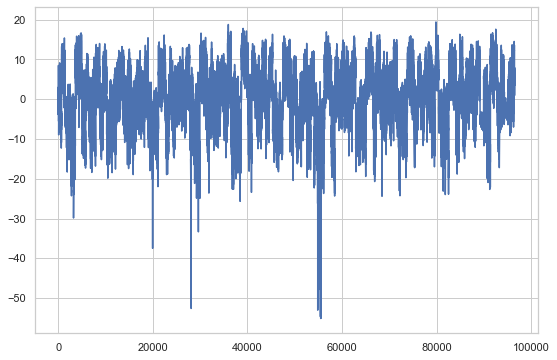

In [12]:
# Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır
plt.figure(figsize=(9,6))
plt.plot(hatalar1)
plt.show()

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


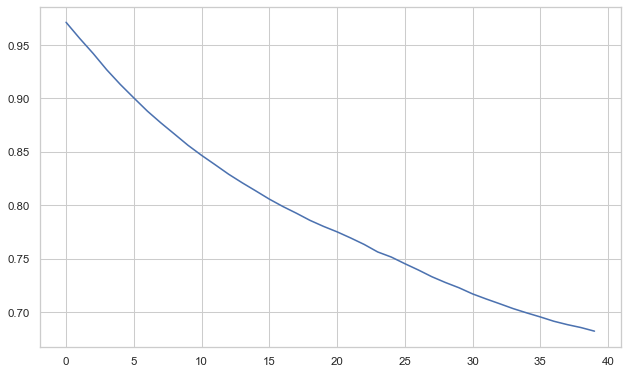

In [13]:
from statsmodels.tsa.stattools import acf

acf_data1 = acf(hatalar1)

plt.figure(dpi=75)
plt.plot(acf_data1[1:])
plt.show()

In [14]:
# Hatalar arasında belirgin bir korelasyon vardır!

In [15]:
# Varsayım 6: özellikler hatalarla korele olmamalıdır

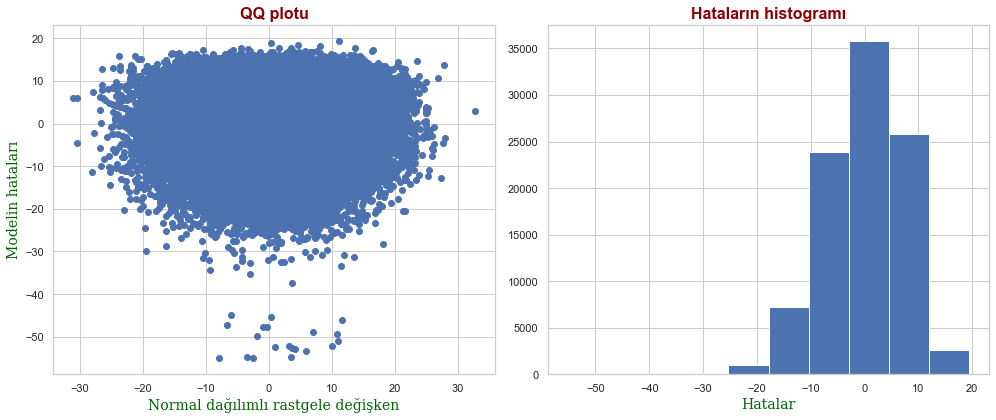

In [16]:
rand_nums1 = np.random.normal(np.mean(hatalar1), np.std(hatalar1), len(hatalar1))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(rand_nums1, hatalar1)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict = axis_font)
plt.ylabel("Modelin hataları", fontdict = axis_font)
plt.title("QQ plotu", fontdict = title_font)

plt.subplot(1,2,2)
plt.hist(hatalar1)
plt.xlabel("Hatalar", fontdict = axis_font)
plt.title("Hataların histogramı", fontdict = title_font)

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import jarque_bera, normaltest

jb_stats1 = jarque_bera(hatalar1)
norm_stats1 = normaltest(hatalar1)

print(f"Jarque-Bera test değeri : {jb_stats1[0]} ve p değeri : {jb_stats1[1]:.15f}")
print(f"Normal test değeri      : {norm_stats1[0]}  ve p değeri : {norm_stats1[1]:.15f}")

Jarque-Bera test değeri : 3793.296735252368 ve p değeri : 0.000000000000000
Normal test değeri      : 3375.4323076995815  ve p değeri : 0.000000000000000


In [18]:
# Null hipotezi olan "Hatalarımız normal dağılımlıdır.", p değerleri 0.05'ten küçük olduğu için reddedilmiştir.

***
# 2. Ev Fiyatları

In [19]:
house = pd.read_csv("house_prices.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
y2 = house["SalePrice"]
x2 = house[["LotArea", "GarageArea", "YearBuilt", "BsmtFinSF1", "TotRmsAbvGrd"]]

In [21]:
x2 = sm.add_constant(x2)
results2_model = sm.OLS(y2, x2)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     506.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          3.35e-315
Time:                        18:08:30   Log-Likelihood:                -17808.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1454   BIC:                         3.566e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.602e+06   9.39e+04    -17.055      0.000   -1.79e+06   -1.42e+06
LotArea          0.7649      0.132      5.783      0.000       0.505       1.024
GarageArea     101.0983      7.322     13.807      0.000      86.735     115.461
YearBuilt      806.3682     48.218     16.724      0.000     711.785     900.952
BsmtFinSF1      33.3476      2.973     11.216      0.000      27.515      39.180
TotRmsAbvGrd  1.885e+04    835.329     22.571      0.000    1.72e+04    2.05e+04
==============================================================================
Omnibus:                      488.999   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14055.776
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                      18.083   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Gauss-Markov varsayımlarının kontrolü
# Varsayım 1: Katsayılarda modelin doğrusallığı


In [23]:
# Varsayım 2: Hata terimi ortalamada sıfır olmalıdır
tahmin2 = results2.predict(x2)    # https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
hatalar2 = y2 - tahmin2

print(f"Ev fiyatları modelinin ortalama hatası: {hatalar2.mean():.16f}")

Ev fiyatları modelinin ortalama hatası: 0.0000000034442988


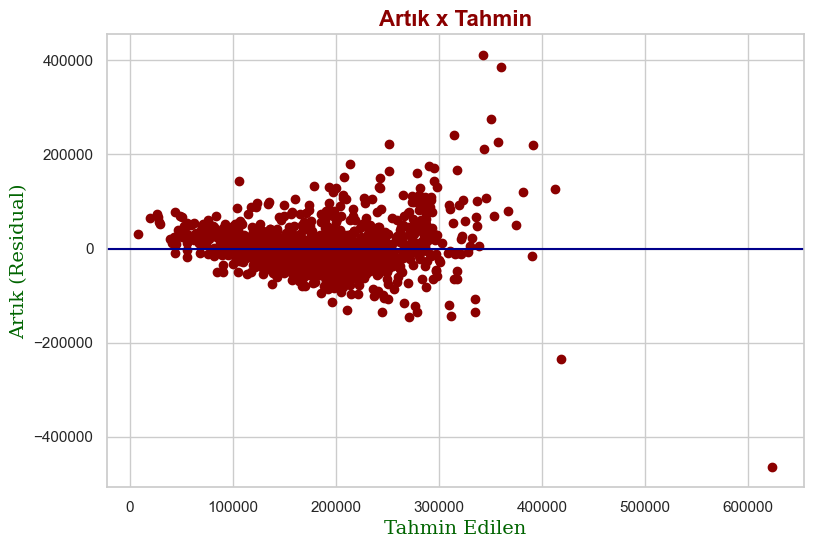

In [24]:
# Varsayım 3: homoscedasticity (eş varyanslık)
plt.figure(figsize=(9,6), dpi=100)
plt.scatter(tahmin2, hatalar2, color="darkred")
plt.xlabel('Tahmin Edilen', fontdict = axis_font)
plt.ylabel('Artık (Residual)', fontdict = axis_font)
plt.axhline(y=0, color="darkblue")
plt.title('Artık x Tahmin', fontdict = title_font)
plt.show()

In [25]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats2 = bartlett(tahmin2, hatalar2)
lev_stats2 = levene(tahmin2, hatalar2)

print(f"Bartlett test değeri : {bart_stats2[0]:.3f} ve p değeri : {bart_stats2[1]:.21f}")
print(f"Levene test değeri   : {lev_stats2[0]:.3f} ve p değeri : {lev_stats2[1]:.21f}")

Bartlett test değeri : 110.668 ve p değeri : 0.000000000000000000000
Levene test değeri   : 156.295 ve p değeri : 0.000000000000000000000


In [26]:
# null hipotezi ("Hatalarımız eş varyanslıdır.") reddedildiği için hatalarımız değişen varyanslıdır (heteroscedastic).

In [27]:
# Varsayım 4: düşük çoklu doğrusallık/low multicollinearity
# açıklayıcı değişkenlerin kendi içlerindeki korelasyonu
house[["LotArea", "GarageArea", "YearBuilt", "BsmtFinSF1", "TotRmsAbvGrd"]].corr()

,LotArea,GarageArea,YearBuilt,BsmtFinSF1,TotRmsAbvGrd
LotArea,1.000000,0.180403,0.014228,0.214103,0.190015
GarageArea,0.180403,1.000000,0.478954,0.296970,0.337822
YearBuilt,0.014228,0.478954,1.000000,0.249503,0.095589
BsmtFinSF1,0.214103,0.296970,0.249503,1.000000,0.044316
TotRmsAbvGrd,0.190015,0.337822,0.095589,0.044316,1.000000


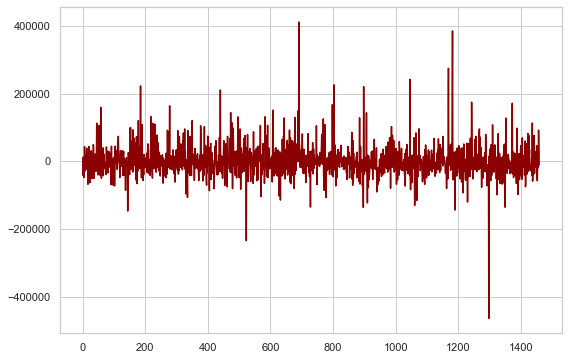

In [28]:
# Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır
plt.figure(figsize=(9,6))
plt.plot(hatalar2, color="darkred")
plt.show()

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


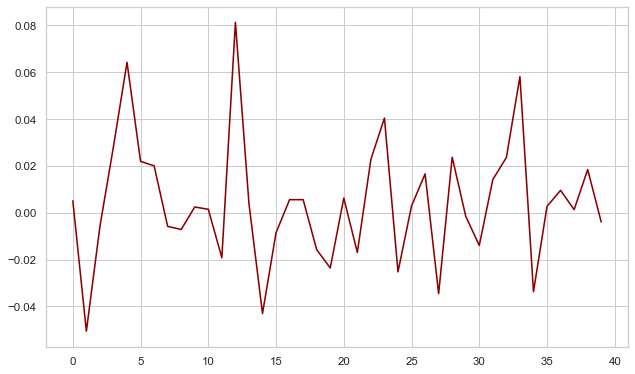

In [29]:
from statsmodels.tsa.stattools import acf

acf_data2 = acf(hatalar2)

plt.figure(dpi=75)
plt.plot(acf_data2[1:], color="darkred")
plt.show()

In [30]:
# Hatalar arasında belirgin bir korelasyon yoktur.

In [31]:
# Varsayım 6: özellikler hatalarla korele olmamalıdır

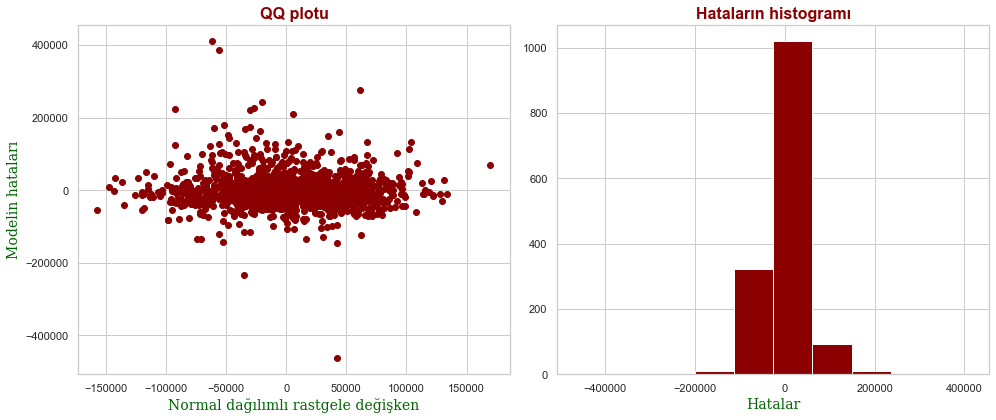

In [32]:
rand_nums2 = np.random.normal(np.mean(hatalar2), np.std(hatalar2), len(hatalar2))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(rand_nums2, hatalar2, color = "darkred")
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict = axis_font)
plt.ylabel("Modelin hataları", fontdict = axis_font)
plt.title("QQ plotu", fontdict = title_font)

plt.subplot(1,2,2)
plt.hist(hatalar2, color = "darkred")
plt.xlabel("Hatalar", fontdict = axis_font)
plt.title("Hataların histogramı", fontdict = title_font)

plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import jarque_bera, normaltest

jb_stats2 = jarque_bera(hatalar2)
norm_stats2 = normaltest(hatalar2)

print(f"Jarque-Bera test değeri : {jb_stats2[0]} ve p değeri : {jb_stats2[1]:.15f}")
print(f"Normal test değeri      : {norm_stats2[0]}  ve p değeri : {norm_stats2[1]:.15f}")

Jarque-Bera test değeri : 14055.775736310712 ve p değeri : 0.000000000000000
Normal test değeri      : 488.99902110870335  ve p değeri : 0.000000000000000


In [34]:
# Null hipotezi olan "Hatalarımız normal dağılımlıdır.", p değerleri 0.05'ten küçük olduğu için reddedilmiştir.